## Algortihm Application

> Decision Tress

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 

In [4]:
import warnings
warnings.simplefilter("ignore")

## Decision Trees

In [4]:
path = '../_my_work_/X_opening.csv'
x = pd.read_csv(path)
y= x['worldwide_gross']
X = x.drop('worldwide_gross',axis=1)

In [5]:
x.shape, y.shape

((2221, 10), (2221,))

In [6]:
x.head(2)

,production_budget,worldwide_gross,title_year,aspect_ratio,duration.1,cast_total_facebook_likes,budget,imdb_score,opening_gross,screens
0,425000000.0,2.783919e+09,2009.0,1.78,178.0,4834.0,237000000.0,7.9,77025481.0,3452.0
1,300000000.0,9.634204e+08,2007.0,2.35,169.0,48350.0,300000000.0,7.1,139802190.0,4362.0


In [7]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, random_state = 1)

###  Tree Model

In [8]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor(max_depth=2)

In [9]:
model.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=2)

### To visualized Graphs

In [10]:
!pip install --upgrade graphviz

Requirement already up-to-date: graphviz in c:\users\pc\anaconda3\lib\site-packages (0.14)


In [11]:
import graphviz 

###  Interfaz Between Graphs and Tree Model

In [12]:
from sklearn.tree import export_graphviz
treedot = export_graphviz(model, out_file=None, feature_names=x.columns)

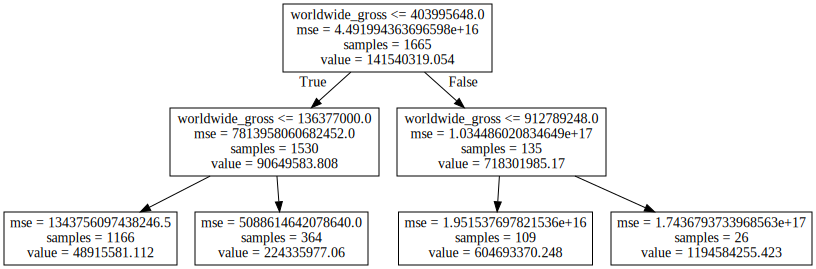

In [13]:
#To visualized
graphviz.Source(treedot)

## Random Forest

In [15]:
from sklearn.ensemble import RandomForestRegressor

In [17]:
#To evaluate the performance of the model
from sklearn.model_selection import cross_validate

In [48]:
#number of trees (models)
trees = 200
forest = RandomForestRegressor(trees)
results = cross_validate(forest, x,y, cv=5, scoring='r2', return_train_score = True)

In [49]:
results = cross_validate(forest,x,y,cv=5,scoring='r2')
results.keys()

dict_keys(['fit_time', 'score_time', 'test_score'])

 Why I donnot have train_score in variable results?

In [44]:
test_scores = results['test_score']
#train_scores = results['train_score']

In [45]:
 results['test_score']

array([0.84368751, 0.99993441, 0.9999894 , 0.99999053, 0.99999257])

In [46]:
print(np.mean(test_scores))

0.968718884505568


## Gradient Boosted Trees

In [50]:
from sklearn.ensemble import GradientBoostingRegressor

ensemble = GradientBoostingRegressor()
results = cross_validate(ensemble, x,y, cv=5, scoring='r2',return_train_score = True)

In [40]:
results

{'fit_time': array([0.28693414, 0.2962811 , 0.28876019, 0.30284142, 0.3011446 ]),
 'score_time': array([0.        , 0.00298691, 0.00802231, 0.        , 0.00205112]),
 'test_score': array([0.85789095, 0.99795176, 0.99969461, 0.99964559, 0.99965924]),
 'train_score': array([0.99995233, 0.9999583 , 0.99995528, 0.9999523 , 0.99995407])}

In [51]:
test_scores = results['test_score']
train_scores = results['train_score']
print(np.mean(test_scores))
print(np.mean(train_scores))

0.969817215481028
0.9999544574444421


## Optimization

In [5]:
path = '../_my_work_/intermediate_result/X_opening.csv'
x = pd.read_csv(path)
y= x['worldwide_gross']
X = x.drop('worldwide_gross',axis=1)

##### Step 1: 

First separation of data

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x,y,random_state=1)

##### Step 2:

Use Grid Search + Cross-Validation

In [8]:
from sklearn.model_selection import GridSearchCV
#estimators to test in the model 
param_test1 = {'n_estimators': range(20,501,20)}

In [12]:
list(param_test1['n_estimators'])

[20,
 40,
 60,
 80,
 100,
 120,
 140,
 160,
 180,
 200,
 220,
 240,
 260,
 280,
 300,
 320,
 340,
 360,
 380,
 400,
 420,
 440,
 460,
 480,
 500]

In [14]:
from sklearn.ensemble import GradientBoostingRegressor
estimator = GradientBoostingRegressor(learning_rate=0.1,
                                     min_samples_split=500,
                                     min_samples_leaf=50,
                                     max_depth=8,
                                     max_features='sqrt',
                                     subsample=0.8,
                                     random_state=10)

In [15]:
gsearch1 = GridSearchCV(estimator,
                       param_grid = param_test1,
                       scoring='r2',
                       cv=5)

In [16]:
gsearch1.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=GradientBoostingRegressor(max_depth=8,
                                                 max_features='sqrt',
                                                 min_samples_leaf=50,
                                                 min_samples_split=500,
                                                 random_state=10,
                                                 subsample=0.8),
             param_grid={'n_estimators': range(20, 501, 20)}, scoring='r2')

In [19]:
#Important final atributes
gsearch1.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_n_estimators', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])

In [21]:
#gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_
list(gsearch1.cv_results_['mean_test_score']) 

[0.8322057539848619,
 0.883619470300229,
 0.8953989393758791,
 0.8991649064158921,
 0.901691274428185,
 0.9033756438704046,
 0.9048990762918085,
 0.9061397772396551,
 0.9068768696546071,
 0.9065832767482321,
 0.9067570861471947,
 0.907414355613799,
 0.9066960645071556,
 0.9070179657758575,
 0.9076497114314108,
 0.907590783614193,
 0.9079690347410736,
 0.9081903301558855,
 0.9076999381924097,
 0.9074084137226791,
 0.9071042083465135,
 0.9073112454079668,
 0.9066001382451386,
 0.9062162166734054,
 0.9066090821716722]

In [25]:
#Use zip to make list() function serve for several tuples
list(zip(gsearch1.cv_results_['mean_test_score'], 
         gsearch1.cv_results_['std_test_score'],
         gsearch1.cv_results_['rank_test_score'], 
         gsearch1.cv_results_['params'])), 

([(0.8322057539848619, 0.08321283007273875, 25, {'n_estimators': 20}),
  (0.883619470300229, 0.07996089876182211, 24, {'n_estimators': 40}),
  (0.8953989393758791, 0.07600000899592016, 23, {'n_estimators': 60}),
  (0.8991649064158921, 0.07608506772924224, 22, {'n_estimators': 80}),
  (0.901691274428185, 0.07499341796118039, 21, {'n_estimators': 100}),
  (0.9033756438704046, 0.07360963378119008, 20, {'n_estimators': 120}),
  (0.9048990762918085, 0.07281240789019487, 19, {'n_estimators': 140}),
  (0.9061397772396551, 0.07224347579393685, 18, {'n_estimators': 160}),
  (0.9068768696546071, 0.07236494432544538, 11, {'n_estimators': 180}),
  (0.9065832767482321, 0.07199204908410889, 16, {'n_estimators': 200}),
  (0.9067570861471947, 0.07198239953779263, 12, {'n_estimators': 220}),
  (0.907414355613799, 0.07229574092935813, 6, {'n_estimators': 240}),
  (0.9066960645071556, 0.07187994151213102, 13, {'n_estimators': 260}),
  (0.9070179657758575, 0.07209065812940384, 10, {'n_estimators': 280}),


In [26]:
gsearch1.best_params_, gsearch1.best_score_

({'n_estimators': 360}, 0.9081903301558855)

In [29]:
#Resume of best parameters
gsearch1.best_estimator_

GradientBoostingRegressor(max_depth=8, max_features='sqrt', min_samples_leaf=50,
                          min_samples_split=500, n_estimators=360,
                          random_state=10, subsample=0.8)

#### Step 3: 
Training Model with best Parameters

In [32]:
from sklearn.model_selection import cross_validate
final_results = cross_validate(gsearch1.best_estimator_,X_train,y_train,return_train_score = True)

In [33]:
final_results

{'fit_time': array([0.42544317, 0.3926053 , 0.41930962, 0.41460729, 0.41899514]),
 'score_time': array([0.        , 0.        , 0.0040071 , 0.00399423, 0.0039525 ]),
 'test_score': array([0.79331109, 0.85647916, 0.97550511, 0.96998698, 0.94566931]),
 'train_score': array([0.95566383, 0.92928577, 0.91091237, 0.92556506, 0.92406543])}

In [34]:
test_scores = final_results['test_score']
train_scores = final_results['train_score']
print(np.mean(train_scores))
print(np.mean(test_scores))

0.9290984891869039
0.9081903301558855


####  Step 4: 
Evaluate best model with test data

In [41]:
estimator = GradientBoostingRegressor(learning_rate=0.1,
                                     min_samples_split=500,
                                     min_samples_leaf=50,
                                     max_depth=8,
                                     max_features='sqrt',
                                     subsample=0.8,
                                     random_state=10,
                                     n_estimators=360)

In [42]:
estimator.fit(X_train,y_train)

GradientBoostingRegressor(max_depth=8, max_features='sqrt', min_samples_leaf=50,
                          min_samples_split=500, n_estimators=360,
                          random_state=10, subsample=0.8)

In [43]:
estimator.score(X_test,y_test)

0.9654744918439433